In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
df = pd.read_csv('C:/csv_files/archive/input_data.csv')
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [153]:
df_cleaned = df.dropna()

In [155]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1034, 15)


In [157]:
df.count()

date             100000
price            100000
level            100000
levels           100000
rooms            100000
area             100000
kitchen_area     100000
geo_lat          100000
geo_lon          100000
building_type    100000
object_type      100000
postal_code       94878
street_id         65681
id_region        100000
house_id          75635
dtype: int64

In [159]:
df = df.drop_duplicates()
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [161]:
df.count()

date             98966
price            98966
level            98966
levels           98966
rooms            98966
area             98966
kitchen_area     98966
geo_lat          98966
geo_lon          98966
building_type    98966
object_type      98966
postal_code      93873
street_id        64956
id_region        98966
house_id         74857
dtype: int64

In [163]:
print(df.isnull().sum())

date                 0
price                0
level                0
levels               0
rooms                0
area                 0
kitchen_area         0
geo_lat              0
geo_lon              0
building_type        0
object_type          0
postal_code       5093
street_id        34010
id_region            0
house_id         24109
dtype: int64


In [165]:
df_cleaned = df.dropna()
df_cleaned.count()

date             61461
price            61461
level            61461
levels           61461
rooms            61461
area             61461
kitchen_area     61461
geo_lat          61461
geo_lon          61461
building_type    61461
object_type      61461
postal_code      61461
street_id        61461
id_region        61461
house_id         61461
dtype: int64

In [167]:
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

In [169]:
df_cleaned.loc[:, 'building_type'] = pd.factorize(df_cleaned['building_type'])[0]
df_cleaned.loc[:, 'object_type'] = pd.factorize(df_cleaned['object_type'])[0]

In [171]:
X = df_cleaned[['area', 'rooms', 'level', 'levels']]
y = df_cleaned['price']

Выделяю признаки линейной регрессии

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
model = LinearRegression()

In [178]:
model.fit(X_train, y_train)

LinearRegression()

In [180]:
y_pred = model.predict(X_test)

In [182]:
mean_abs_err = mean_absolute_error(y_test, y_pred)
mean_sqr_err = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mean_abs_err}")
print(f"Mean Squared Error: {mean_sqr_err}")

Mean Absolute Error: 1334577.3613279958
Mean Squared Error: 3292494412290.896


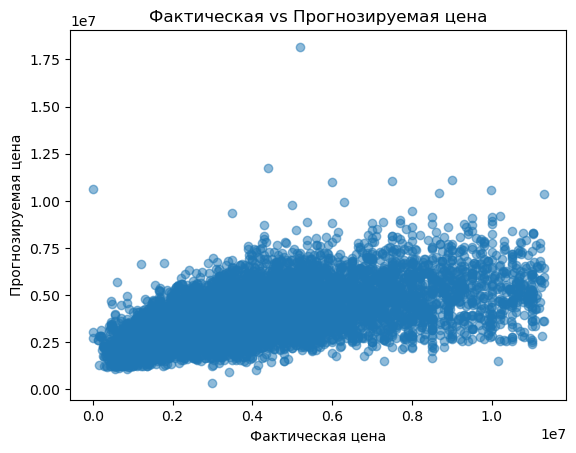

In [184]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Фактическая цена')
plt.ylabel('Прогнозируемая цена')
plt.title('Фактическая vs Прогнозируемая цена')
plt.show()

In [186]:
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

          Coefficient
area     51712.715643
rooms  -141732.779542
level    -1912.578190
levels  120373.189233
